In [36]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA =False

## pre-processing step

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat" # give the directory of images
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}  
    training_data = []
    catcount = 0
    dogcount = 0 # make sure the "balance"
    
    def make_training_data(self):
        for label in self.LABELS: #iterate the directory
            print(label)
            for f in tqdm(os.listdir(label)):  # iterate all the image within the directory, f -> the file name
                try:
                    path = os.path.join(label, f) # get the full path to the image
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # convert the iimage to gray scale (optional)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [38]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [39]:
print(len(training_data))

24946


In [47]:
for i in range(4):
    print(training_data[i])

[array([[150, 109,  69, ...,  91,  81, 125],
       [114,  83,  88, ...,  60,  63,  93],
       [136,  88,  69, ...,  63,  86,  86],
       ...,
       [ 43,  72,  94, ...,  63,  77,  71],
       [108,  84, 114, ...,  53,  62,  46],
       [ 82, 102, 110, ...,  41,  52,  72]], dtype=uint8)
 array([0., 1.])]
[array([[ 91, 105, 106, ..., 234, 230, 215],
       [ 95,  96, 100, ..., 236, 156, 144],
       [100, 101, 101, ..., 153, 162, 200],
       ...,
       [123, 113, 102, ..., 215, 215, 214],
       [ 87,  72,  60, ..., 215, 216, 216],
       [ 39,  20,  26, ..., 204, 215, 216]], dtype=uint8)
 array([0., 1.])]
[array([[115, 105, 107, ..., 109, 108, 120],
       [116, 106, 103, ..., 104, 104, 113],
       [125, 108, 106, ..., 109, 104, 119],
       ...,
       [178, 180, 186, ...,  79,  78,  83],
       [ 80,  85,  95, ...,  77,  73,  83],
       [100,  89,  88, ...,  75,  77,  78]], dtype=uint8)
 array([1., 0.])]
[array([[ 10,  14,  16, ..., 160, 148, 131],
       [ 22,  28,  34, ..., 

In [48]:
import matplotlib.pyplot as plt


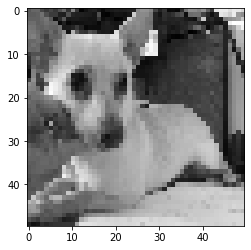

In [74]:
plt.imshow(training_data[1][0], cmap="gray")
plt.show()

In [61]:
print(training_data[1][1])

[0. 1.]


In [68]:
for i in range(5):
    print(training_data[i][1])

[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]


In [70]:
training_data[1][0]

array([[ 91, 105, 106, ..., 234, 230, 215],
       [ 95,  96, 100, ..., 236, 156, 144],
       [100, 101, 101, ..., 153, 162, 200],
       ...,
       [123, 113, 102, ..., 215, 215, 214],
       [ 87,  72,  60, ..., 215, 216, 216],
       [ 39,  20,  26, ..., 204, 215, 216]], dtype=uint8)

In [71]:
training_data[1][1]

array([0., 1.])

In [15]:
np.array(3)

array(3)

In [16]:
data = []
data

[]

In [17]:
#data.append([np.array(3)])

In [18]:
data

[]

In [19]:
for i in range(3):
    data.append([np.array(i), np.eye(3)[i]])
    print(data)

[[array(0), array([1., 0., 0.])]]
[[array(0), array([1., 0., 0.])], [array(1), array([0., 1., 0.])]]
[[array(0), array([1., 0., 0.])], [array(1), array([0., 1., 0.])], [array(2), array([0., 0., 1.])]]
